# Import Libraries

In [115]:
import sklearn
print(sklearn.__version__)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


1.6.1


# Load Data

In [116]:
df = pd.read_csv(r"..\Data\raw\test.csv")

# LETS START PREPROCESSING DATA!

## calculating missing 

In [117]:
total = len(df)

percent_missing = (df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': df.columns,
    'missing_percentage': percent_missing.round(2)
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='missing_percentage', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage
Sunshine,Sunshine,47.37%
Evaporation,Evaporation,42.72%
Cloud3pm,Cloud3pm,40.17%
Cloud9am,Cloud9am,37.91%
Pressure9am,Pressure9am,9.59%
Pressure3pm,Pressure3pm,9.56%
WindDir9am,WindDir9am,6.88%
WindGustDir,WindGustDir,6.49%
WindGustSpeed,WindGustSpeed,6.43%
Humidity3pm,Humidity3pm,2.51%


## visually representing Missing values

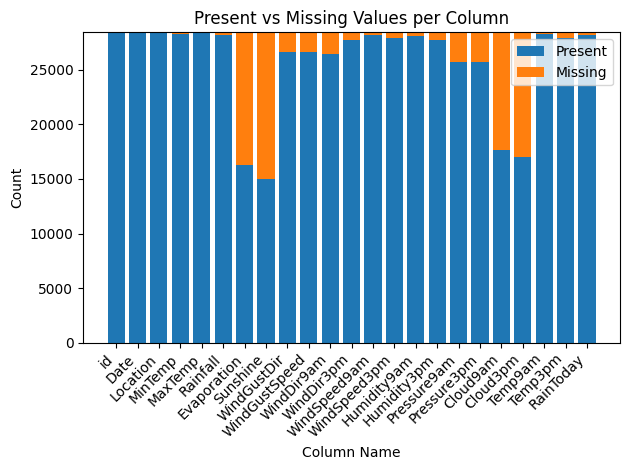

In [118]:
import matplotlib.pyplot as plt

present = df.notnull().sum()
missing = df.isnull().sum()

plt.bar(df.columns, present, label='Present')
plt.bar(df.columns, missing, bottom=present, label='Missing')
plt.xlabel('Column Name')
plt.ylabel('Count')
plt.title('Present vs Missing Values per Column')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()
plt.show()

## drop colomns

In [119]:
preprocessed_df = df.copy()

In [120]:
cols_to_drop = []
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count / len(df) > 0.35:
        cols_to_drop.append(col)

preprocessed_df.drop(columns=cols_to_drop, inplace=True)
print(f"Dropped columns: {cols_to_drop}")

        

Dropped columns: ['Evaporation', 'Sunshine', 'Cloud9am', 'Cloud3pm']


## thinking what to do with other missing values

In [121]:
total = len(preprocessed_df)

percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2),
    'Data Type': preprocessed_df.dtypes
})

# Sort by missing_percentage in descending order
missing_stats = missing_stats.sort_values(by='Data Type', ascending=False)

# Add % sign for display
missing_stats['missing_percentage'] = missing_stats['missing_percentage'].astype(str) + '%'

missing_stats

,Column Name,missing_percentage,Data Type
WindDir3pm,WindDir3pm,2.5%,object
WindGustDir,WindGustDir,6.49%,object
Date,Date,0.0%,object
WindDir9am,WindDir9am,6.88%,object
RainToday,RainToday,0.97%,object
Location,Location,0.0%,object
Rainfall,Rainfall,0.97%,float64
MaxTemp,MaxTemp,0.23%,float64
WindGustSpeed,WindGustSpeed,6.43%,float64
MinTemp,MinTemp,0.44%,float64


## handle missing values


In [122]:
for col in preprocessed_df.columns:
    if preprocessed_df[col].dtype in ['int64', 'float64']:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mean())
    else:
        preprocessed_df[col] = preprocessed_df[col].fillna(preprocessed_df[col].mode()[0])


## check after adding missing values

In [123]:
total=len(preprocessed_df)

preprocessed_df.isnull().sum()
percent_missing = (preprocessed_df.isnull().sum() / total) * 100

missing_stats = pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'missing_percentage': percent_missing.round(2).astype(str) + '%'
})

missing_stats

,Column Name,missing_percentage
id,id,0.0%
Date,Date,0.0%
Location,Location,0.0%
MinTemp,MinTemp,0.0%
MaxTemp,MaxTemp,0.0%
Rainfall,Rainfall,0.0%
WindGustDir,WindGustDir,0.0%
WindGustSpeed,WindGustSpeed,0.0%
WindDir9am,WindDir9am,0.0%
WindDir3pm,WindDir3pm,0.0%


## split or join columns

In [124]:
#SPLIT Date INTO sub-columns: Month and Year
preprocessed_df[['Year','Month','Day']] = preprocessed_df['Date'].str.split('-', expand=True)


#drop the original Date column
preprocessed_df = preprocessed_df.drop(['Date'], axis=1)


## Encoding

*only qualititive data will be encoded*

In [125]:
from sklearn.preprocessing import OneHotEncoder

## getting unique count of coloms to decide encoding techiques

In [126]:

unique_count=pd.DataFrame({
    'Column Name': preprocessed_df.columns,
    'Unique Count': [preprocessed_df[col].nunique() for col in preprocessed_df.columns],
    'data_type': [preprocessed_df[col].dtype for col in preprocessed_df.columns]
})


unique_count = unique_count.sort_values(by='data_type', ascending=False)
unique_count

,Column Name,Unique Count,data_type
20,Day,31,object
19,Month,12,object
18,Year,11,object
17,RainToday,2,object
5,WindGustDir,16,object
7,WindDir9am,16,object
8,WindDir3pm,16,object
1,Location,49,object
13,Pressure9am,486,float64
16,Temp3pm,444,float64


## check what are the unique Values

In [127]:
var = preprocessed_df["Year"].unique()
var = sorted(var)
print(var)

['2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016', '2017']


# ML works better with Numbers

### converting some other data types to int

In [128]:
preprocessed_df['Year']=preprocessed_df['Year'].astype(int)
preprocessed_df['Month']=preprocessed_df['Month'].astype(int)


### ONE hot encoding for Qualitative Data

In [129]:
from sklearn.preprocessing import OneHotEncoder

In [130]:
cols_to_encode = ['RainToday']
ohe = OneHotEncoder(sparse_output=False, drop='first')
encoded_array = ohe.fit_transform(preprocessed_df[cols_to_encode])
encoded_columns = ohe.get_feature_names_out(cols_to_encode)
encoded_df = pd.DataFrame(encoded_array, columns=encoded_columns)

preprocessed_df.drop(cols_to_encode, axis=1, inplace=True)
preprocessed_df = pd.concat([preprocessed_df, encoded_df], axis=1)



### some qualitative columns has more values that it cannot be one hot encoded.So we do TARGET ENCODING

In [131]:
# # Print the 'Location' value for row numbers 53715 and 78442
# print(preprocessed_df.loc[53715, 'Location'])
# print(preprocessed_df.loc[78442, 'Location'])

In [132]:
import json

cols_to_encode = ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm']
encoding_dicts = {}

for col in cols_to_encode:
    with open(f"../outputs/dictionaries/encoding_dict_{col}.json", "r") as f:
        encoding_dicts[col] = json.load(f)

# Now you can map your test data columns using these loaded dictionaries
for col in cols_to_encode:
    preprocessed_df[col] = preprocessed_df[col].map(encoding_dicts[col])
    
    # Fill missing values if any (categories not seen in training)
    mean_encoding = sum(encoding_dicts[col].values()) / len(encoding_dicts[col])
    preprocessed_df[col] = preprocessed_df[col].fillna(mean_encoding)


In [133]:
preprocessed_df.head(12)

,id,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes
0,113754,0.185252,15.1,32.9,0.0,0.152037,50.00000,0.146406,0.254351,7.0,...,73.0,32.0,1015.5,1011.8,19.0,30.3,2017,1,26,0.0
1,113755,0.300999,8.4,16.2,0.0,0.234448,46.00000,0.306906,0.254351,28.0,...,45.0,74.0,1011.3,1011.9,13.7,14.6,2012,9,12,0.0
2,113756,0.203377,17.0,24.7,0.0,0.205032,39.00000,0.199068,0.226185,13.0,...,56.0,57.0,1007.1,1003.7,21.4,24.2,2015,11,06,0.0
3,113757,0.129087,12.3,18.8,0.0,0.234448,39.00000,0.230641,0.254351,19.0,...,51.0,29.0,1017.7,1015.6,12.9,18.0,2012,4,24,0.0
4,113758,0.196314,1.1,18.3,0.2,0.271224,13.00000,0.306906,0.244337,0.0,...,100.0,49.0,1029.5,1025.5,7.1,17.9,2011,7,28,0.0
5,113759,0.177189,-3.2,14.1,0.0,0.234448,15.00000,0.208486,0.187714,4.0,...,85.0,52.0,1032.7,1030.6,3.6,13.1,2010,7,22,0.0
6,113760,0.256269,17.5,34.2,0.0,0.234448,67.00000,0.309543,0.280539,15.0,...,43.0,15.0,1008.2,1001.3,24.1,33.2,2012,11,01,0.0
7,113761,0.238301,5.9,10.4,0.4,0.205032,46.00000,0.245569,0.198091,20.0,...,57.0,47.0,1021.6,1022.1,8.1,10.4,2010,6,12,0.0
8,113762,0.080132,14.9,39.1,0.0,0.163055,44.00000,0.230641,0.215530,7.0,...,6.0,3.0,1014.8,1010.3,31.6,37.7,2015,10,16,0.0
9,113763,0.200249,9.4,31.1,0.0,0.271224,33.00000,0.208486,0.278537,9.0,...,24.0,7.0,1017.2,1011.5,21.0,29.9,2013,3,20,0.0


### analyzing

In [134]:
print(preprocessed_df['RainToday_Yes'].value_counts())

RainToday_Yes
0.0    22119
1.0     6320
Name: count, dtype: int64


# Scaling

*scaling is for numerical features only*

In [135]:
from sklearn.preprocessing import StandardScaler

In [136]:
target_columns = ['RainTomorrow', 'id']

columns_to_scale = []

# Select columns to scale
for column in preprocessed_df.columns:
    if column not in target_columns and preprocessed_df[column].dtype != 'object':
        columns_to_scale.append(column)

# Apply standard scaling
scaler = StandardScaler()
preprocessed_df[columns_to_scale] = scaler.fit_transform(preprocessed_df[columns_to_scale])

In [137]:
preprocessed_df.sample(20)

,id,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes
22180,135934,1.422474,-0.586587,-1.233618,-8.723941e-02,-0.438051,-0.235180,0.791347,-0.589522,-0.790419,...,1.328183,1.054039e+00,-3.887823e-01,0.158354,-1.012468,-1.331945,-0.690679,1.050430,11,1.870786
27897,141651,1.639762,0.746423,1.653788,-2.847285e-01,1.313587,2.035939,1.317448,1.411446,-0.120798,...,-0.732661,2.322329e+00,-2.786234e+00,-2.650766,1.887800,-0.179579,-0.690679,-1.564087,05,-0.534535
21089,134843,-0.180577,-1.496171,-0.585712,-2.847285e-01,1.383597,1.884531,1.317448,0.108343,0.325616,...,-1.578135,1.444282e+00,-5.811704e-01,-0.364621,-0.268014,-1.652857,-0.296257,0.469426,08,-0.534535
24540,138294,1.639762,-0.069065,-0.515288,1.665476e+00,0.234017,0.294747,0.853179,0.108343,-0.120798,...,0.377025,4.198938e-01,-5.219740e-01,0.113527,-0.314542,-0.529665,-1.479524,-1.273585,26,1.870786
8127,121881,-0.432284,-0.084748,-0.473033,1.344556e+00,-0.438051,-1.597852,-0.031543,-0.831701,-0.567212,...,1.539552,1.200380e+00,3.659712e-01,0.053759,-0.314542,-0.456731,1.281432,0.178924,21,1.870786
1158,114912,-2.427134,-0.617952,0.034024,-2.847285e-01,1.074265,1.051787,1.317448,1.480356,1.330049,...,-1.419609,-1.628882e+00,3.215740e-01,-0.170373,-0.314542,0.155919,-1.085102,0.469426,31,-0.534535
27058,140812,1.182261,-0.163160,-0.571627,-2.847285e-01,-0.114584,0.294747,-0.177461,-0.589522,1.106842,...,1.222499,-5.069335e-01,-8.475540e-01,-0.693348,-0.531675,-0.485904,-1.085102,1.631434,26,-0.534535
21147,134901,-0.016733,0.009347,-0.430778,5.481423e-17,-1.648859,-0.083773,-0.975646,-1.082746,0.548824,...,-1.525293,-9.459570e-01,1.046729e+00,0.860634,-0.423108,-0.369209,0.098165,-0.402079,05,-0.534535
20348,134102,0.013554,-0.476810,-0.416693,-2.353562e-01,-0.438051,2.263050,-0.031543,-0.151725,1.330049,...,-0.891187,-6.532747e-01,-1.667959e-01,0.158354,-0.609222,-0.369209,0.887010,-0.983083,05,-0.534535
25409,139163,0.280038,-1.010014,-1.135023,3.571110e-01,0.966213,0.000000,1.317448,-0.589522,-1.571645,...,1.486710,1.541843e+00,-1.682461e-14,0.000000,-0.965939,-1.200663,0.098165,0.178924,09,1.870786


## To Pickle

In [138]:
preprocessed_df.to_csv(r"../Data\processed\preprocessed_test.csv",index=False)

In [139]:
preprocessed_df.sample()

,id,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Year,Month,Day,RainToday_Yes
19888,133642,-1.267537,1.436452,1.724212,-0.284728,-0.438051,2.035939,1.317448,0.108343,0.325616,...,-0.679818,1.444282,-0.329586,-0.379563,1.484554,0.433071,-1.085102,-1.273585,23,-0.534535
